In [72]:
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('games.csv')

In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# check data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
# check null-values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#check size
df.shape

(16598, 11)

In [8]:
# remove missing values
df = df.dropna()

In [13]:
# characteristics of year distributions
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [14]:
df.Year.mode()

0    2009.0
Name: Year, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Count'>

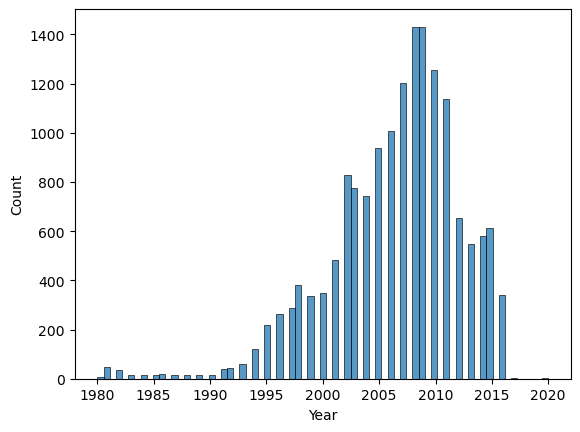

In [50]:
# plot the distribution of the number of released games by year
sns.histplot(df.Year)

In [65]:
# Which platforms have the most releases?
releases = df.groupby('Platform', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Releases_number'})
releases['Releases_percent'] = releases.Releases_number / releases.Releases_number.sum() * 100
[*releases.query('Releases_percent > 7').sort_values('Releases_percent', ascending=False).Platform]

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [70]:
# Games of which publishers are most often found in the dataset?
df.groupby('Publisher', as_index=False) \
        .agg({'Name': 'count'}) \
        .rename(columns={'Name': 'Games_number'}) \
        .sort_values('Games_number', ascending=False)

,Publisher,Games_number
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


In [74]:
# the second way
scipy.stats.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [75]:
# the third way
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [88]:
# Calculate the mean, median and standard deviation of Nintendo game sales by region
df.loc[df.Publisher == 'Nintendo', ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

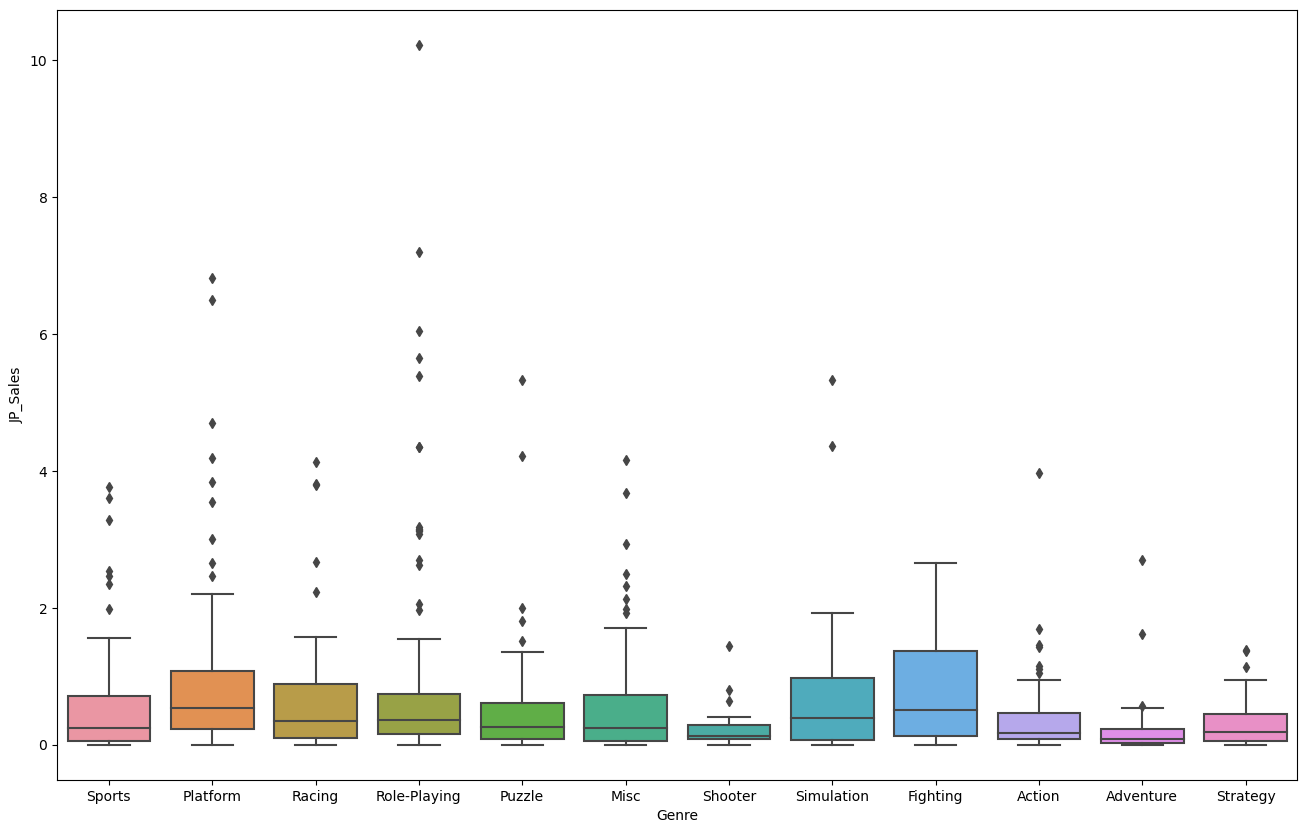

In [100]:
# Build a boxplot to sell Nintendo in Japan by genre
JP_Nintendo = df.loc[df.Publisher == 'Nintendo', ['Genre', 'JP_Sales']]
plt.figure(figsize=(16,10))
sns.boxplot(data=JP_Nintendo, x='Genre', y='JP_Sales')